<a href="https://colab.research.google.com/github/DhivyaaSP/Deep-Learning/blob/main/Exe_2_2_3_Hidden_Nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Epoch 4/1000, Training Loss: 0.0030093861627721753, Test Loss: 0.002492603081874634
Epoch 5/1000, Training Loss: 0.0030073767622905336, Test Loss: 0.0024870695135940316
Epoch 6/1000, Training Loss: 0.003005992011121842, Test Loss: 0.0024837925807603607
Epoch 7/1000, Training Loss: 0.0030048969570399407, Test Loss: 0.002481600222410331
Epoch 8/1000, Training Loss: 0.0030039671883505623, Test Loss: 0.002479986114347598
Epoch 9/1000, Training Loss: 0.0030031406461420063, Test Loss: 0.0024787049791723053
Epoch 10/1000, Training Loss: 0.0030023808808026103, Test Loss: 0.002477628692001488
Epoch 11/1000, Training Loss: 0.0030016650787553566, Test Loss: 0.002476686280230136
Epoch 12/1000, Training Loss: 0.003000978680253929, Test Loss: 0.0024758362468169036
Epoch 13/1000, Training Loss: 0.003000312345029329, Test Loss: 0.002475052992219491
Epoch 14/1000, Training Loss: 0.00299966006600235, Test Loss: 0.0024743198722566996
Epoch 15/1000, Train

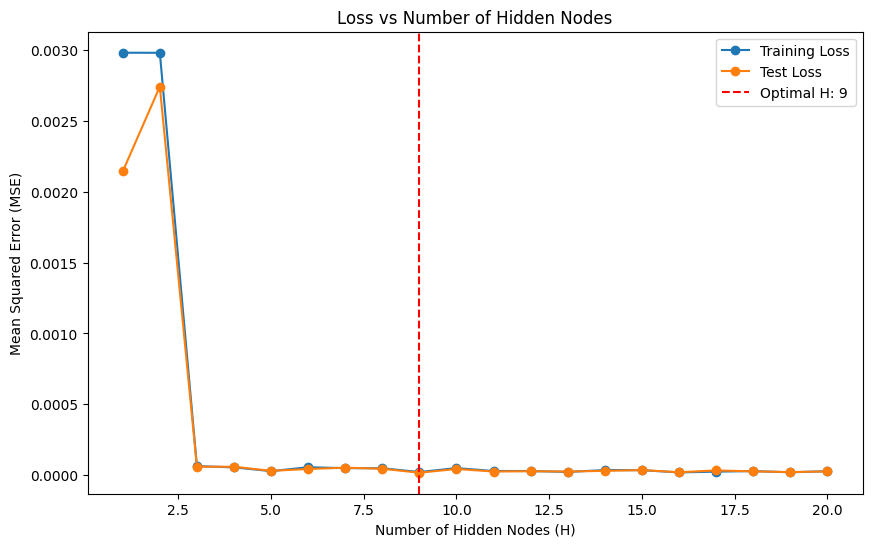

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MLP class with one hidden layer
class MLP:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        # Initialize the number of nodes in each layer
        self.input_nodes = input_nodes + 1  # Including bias
        self.hidden_nodes = hidden_nodes + 1  # Including bias
        self.output_nodes = output_nodes

        # Initialize weights with random values
        self.weights_input_hidden = np.random.rand(self.input_nodes, self.hidden_nodes - 1) - 0.5
        self.weights_hidden_output = np.random.rand(self.hidden_nodes, self.output_nodes) - 0.5

        # Include bias in the inputs
        self.bias_input = np.random.rand(self.input_nodes) - 0.5
        self.bias_hidden = np.random.rand(self.hidden_nodes) - 0.5

        # Initialize lists to store training and test losses
        self.training_loss_history = []
        self.test_loss_history = []

    def forward_pass(self, inputs):
        # Add bias to inputs
        inputs_with_bias = np.concatenate((inputs, [1]), axis=0)

        # Compute input and output for the hidden layer
        self.hidden_input = np.dot(inputs_with_bias, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        # Add bias to hidden layer outputs
        hidden_output_with_bias = np.concatenate((self.hidden_output, [1]), axis=0)

        # Compute input and output for the output layer
        self.final_input = np.dot(hidden_output_with_bias, self.weights_hidden_output)
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward_pass(self, inputs, expected_output, output, learning_rate):
        # Compute error
        error = expected_output - output

        # Gradient for output weights
        d_weights_hidden_output = np.dot(np.concatenate((self.hidden_output, [1]), axis=0).reshape(-1,1),
                                         error * sigmoid_derivative(output).reshape(1, -1))

        # Error for hidden layer
        hidden_error = np.dot(self.weights_hidden_output, error * sigmoid_derivative(output))[:-1]

        # Gradient for input weights
        d_weights_input_hidden = np.dot(np.concatenate((inputs, [1]), axis=0).reshape(-1,1),
                                        hidden_error * sigmoid_derivative(self.hidden_output).reshape(1, -1))

        # Update the weights
        self.weights_hidden_output += learning_rate * d_weights_hidden_output
        self.weights_input_hidden += learning_rate * d_weights_input_hidden

    def train_and_evaluate(self, dataset, test_inputs, test_expected_output, max_epochs, learning_rate):
        # Split dataset into inputs and expected outputs
        inputs = dataset[:, :2]
        expected_output = dataset[:, 2:]

        # Training loop
        for epoch in range(max_epochs):
            for j in range(inputs.shape[0]):
                input_sample = inputs[j]
                output = self.forward_pass(input_sample)
                self.backward_pass(input_sample, expected_output[j], output, learning_rate)

            # Calculate training loss
            training_loss = np.mean(np.square(expected_output - self.predict(inputs)))
            self.training_loss_history.append(training_loss)

            # Calculate test loss
            test_loss = np.mean(np.square(test_expected_output - self.predict(test_inputs)))
            self.test_loss_history.append(test_loss)

            # Print out progress
            print(f"Epoch {epoch+1}/{max_epochs}, Training Loss: {training_loss}, Test Loss: {test_loss}")

    def predict(self, inputs):
        outputs = np.array([self.forward_pass(input_sample) for input_sample in inputs])
        return outputs

# Function to calculate the multivariate normal density
def multivariate_gaussian_density(x, mu, cov):
    n = mu.shape[0]
    diff = x - mu
    return (1. / (np.sqrt((2 * np.pi)**n * np.linalg.det(cov)))) * \
           np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))

# Parameters for the Gaussian
mu_x = np.array([0, 0])
cov_x = np.array([[0.3, -0.5],
                  [-0.5, 2]])

# Set the number of input samples and epochs
N = 1600
E = 1000

# Set the range of hidden nodes
hidden_nodes_range = range(1, 21)  # From 1 to 20 hidden nodes

# Initialize lists to store test loss and optimal epochs
test_loss_values = []
training_loss_values = []

for H in hidden_nodes_range:
    # Generate N training samples randomly
    samples = np.zeros((N, 3))
    samples[:, 0] = np.random.uniform(-2, 2, N)  # x1
    samples[:, 1] = np.random.uniform(-4, 4, N)  # x2

    # Calculate the function value for each sample
    for i in range(N):
        samples[i, 2] = multivariate_gaussian_density(samples[i, :2], mu_x, cov_x)

    # Generate new test data
    N_test = 100  # Change this to your dataset size for testing
    test_samples = np.zeros((N_test, 3))
    test_samples[:, 0] = np.random.uniform(-2, 2, N_test)  # x1 range
    test_samples[:, 1] = np.random.uniform(-4, 4, N_test)  # x2 range

    for i in range(N_test):
        test_samples[i, 2] = multivariate_gaussian_density(test_samples[i, :2], mu_x, cov_x)

    # Initialize the MLP
    mlp = MLP(input_nodes=2, hidden_nodes=H, output_nodes=1)
    mlp.train_and_evaluate(samples, test_samples[:, :2], test_samples[:, 2:], max_epochs=E, learning_rate=0.1)

    # Record test loss and training loss
    test_loss_values.append(mlp.test_loss_history[-1])
    training_loss_values.append(mlp.training_loss_history[-1])

# Find the index of the minimum test loss value
optimal_H_index = np.argmin(test_loss_values)
optimal_H = hidden_nodes_range[optimal_H_index]
min_test_loss = test_loss_values[optimal_H_index]
optimal_epoch_for_optimal_H = E  # Optimal epoch is fixed at E

print(f"Optimal Number of Hidden Nodes (H*): {optimal_H}")
print(f"Corresponding Optimal Epoch: {optimal_epoch_for_optimal_H}")
print(f"Minimum Test Loss: {min_test_loss}")

# Plot test loss and training loss against the number of hidden nodes
plt.figure(figsize=(10, 6))
plt.plot(hidden_nodes_range, training_loss_values, marker='o', linestyle='-', label='Training Loss')
plt.plot(hidden_nodes_range, test_loss_values, marker='o', linestyle='-', label='Test Loss')
plt.title('Loss vs Number of Hidden Nodes')
plt.xlabel('Number of Hidden Nodes (H)')
plt.ylabel('Mean Squared Error (MSE)')
plt.axvline(x=optimal_H, color='r', linestyle='--', label=f'Optimal H: {optimal_H}')
plt.legend()
plt.show()
